In [1]:
import os
import numpy as np
import pandas as pd
import pylab as pl

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
stations_class = pd.read_csv('Clean_Data/stations_class.csv')

In [6]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,0.270270,0.405405,0.243243,0.162162,0.054054,0.135135,0.027027,0.081081,0.270270,0.108108,0.432432,0.108108,1.270270,0.135135,1.540541,0.675676,2.594595,0.702703,1.945946,0.513514,1.567568,0.972973,1.648649,1.432432,1.540541,1.027027,1.243243,1.378378,1.243243,1.405405,1.729730,2.054054,1.864865,2.135135,1.864865,3.054054,1.864865,3.567568,2.081081,3.027027,0.729730,2.405405,0.675676,1.621622,0.810811,1.486486,0.540541,0.891892,3
1,445,0.173077,0.557692,0.076923,0.250000,0.076923,0.134615,0.076923,0.115385,0.019231,0.038462,0.134615,0.115385,0.788462,0.269231,1.461538,0.384615,3.769231,0.576923,3.903846,0.557692,3.288462,1.019231,2.134615,0.942308,1.750000,1.019231,1.769231,1.307692,1.615385,1.519231,1.865385,2.326923,1.788462,1.846154,1.173077,1.942308,0.980769,3.480769,0.865385,3.153846,1.115385,2.384615,0.557692,1.096154,0.423077,1.519231,0.346154,0.711538,3
2,487,0.058824,0.529412,0.058824,0.205882,0.000000,0.352941,0.058824,0.088235,0.088235,0.058824,1.117647,0.029412,2.411765,0.117647,4.000000,0.794118,3.647059,1.000000,1.588235,1.117647,0.823529,0.676471,1.617647,1.117647,1.529412,1.352941,1.500000,1.588235,1.705882,2.352941,1.676471,2.470588,2.382353,2.882353,2.382353,4.470588,2.029412,5.235294,1.882353,3.617647,1.176471,2.529412,0.617647,1.676471,0.470588,1.352941,0.470588,1.117647,3
3,504,1.045455,0.727273,0.500000,0.340909,0.477273,0.295455,0.181818,0.159091,0.136364,0.159091,0.500000,0.181818,1.000000,0.545455,1.909091,1.340909,4.272727,1.954545,3.590909,1.704545,2.772727,2.386364,2.000000,2.227273,2.136364,2.568182,2.590909,2.477273,2.272727,2.318182,2.818182,2.886364,3.090909,3.022727,3.136364,4.545455,3.363636,5.522727,2.295455,3.386364,2.090909,2.340909,1.772727,2.090909,1.886364,1.318182,1.181818,1.022727,2
4,72,0.102564,0.076923,0.051282,0.051282,0.025641,0.128205,0.000000,0.051282,0.000000,0.025641,0.102564,0.230769,0.615385,0.076923,0.641026,1.153846,1.487179,1.051282,1.102564,1.282051,1.666667,1.282051,1.025641,0.897436,0.923077,0.794872,0.692308,0.897436,0.846154,0.743590,1.282051,0.846154,1.128205,0.871795,1.717949,1.153846,1.102564,1.384615,1.102564,0.743590,0.256410,0.692308,0.333333,0.333333,0.102564,0.615385,0.051282,0.358974,4


In [8]:
stations_class = stations_class[[0,-1]]

In [9]:
stations_class.head()

,station_id,label
0,301,3
1,445,3
2,487,3
3,504,2
4,72,4


In [2]:
tripdata = pd.read_csv('Clean_Data/tripdata_new.csv')

In [4]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender
0,801,2015-02-01 00:00:00,2015-02-01 00:14:00,521,423,17131,1978.0,2
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2
3,818,2015-02-01 00:01:00,2015-02-01 00:15:00,2004,505,21044,1985.0,2
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1


In [12]:
tripdata = tripdata.merge(stations_class, how='left', left_on='start station id', right_on='station_id')

In [13]:
c.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender,station_id,label
0,801,2015-02-01 00:00:00,2015-02-01 00:14:00,521,423,17131,1978.0,2,NaN,NaN
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1,497.0,5.0
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2,281.0,4.0
3,818,2015-02-01 00:01:00,2015-02-01 00:15:00,2004,505,21044,1985.0,2,NaN,NaN
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1,323.0,4.0


In [15]:
tripdata = tripdata.dropna()

In [16]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,birth year,gender,station_id,label
1,379,2015-02-01 00:00:00,2015-02-01 00:07:00,497,504,21289,1993.0,1,497.0,5.0
2,2474,2015-02-01 00:01:00,2015-02-01 00:42:00,281,127,18903,1969.0,2,281.0,4.0
4,544,2015-02-01 00:01:00,2015-02-01 00:10:00,323,83,19868,1957.0,1,323.0,4.0
5,717,2015-02-01 00:02:00,2015-02-01 00:14:00,373,2002,15854,1979.0,1,373.0,4.0
7,913,2015-02-01 00:04:00,2015-02-01 00:19:00,439,116,17862,1955.0,1,439.0,2.0


In [17]:
tripdata.shape

(7114701, 10)

In [28]:
stations = [tripdata[tripdata['label']==i]['tripduration'].reset_index() for i in range(0,6)]

In [29]:
type(stations[0])

pandas.core.frame.DataFrame

In [37]:
#a = stations[0]['tripduration'].astype('float')

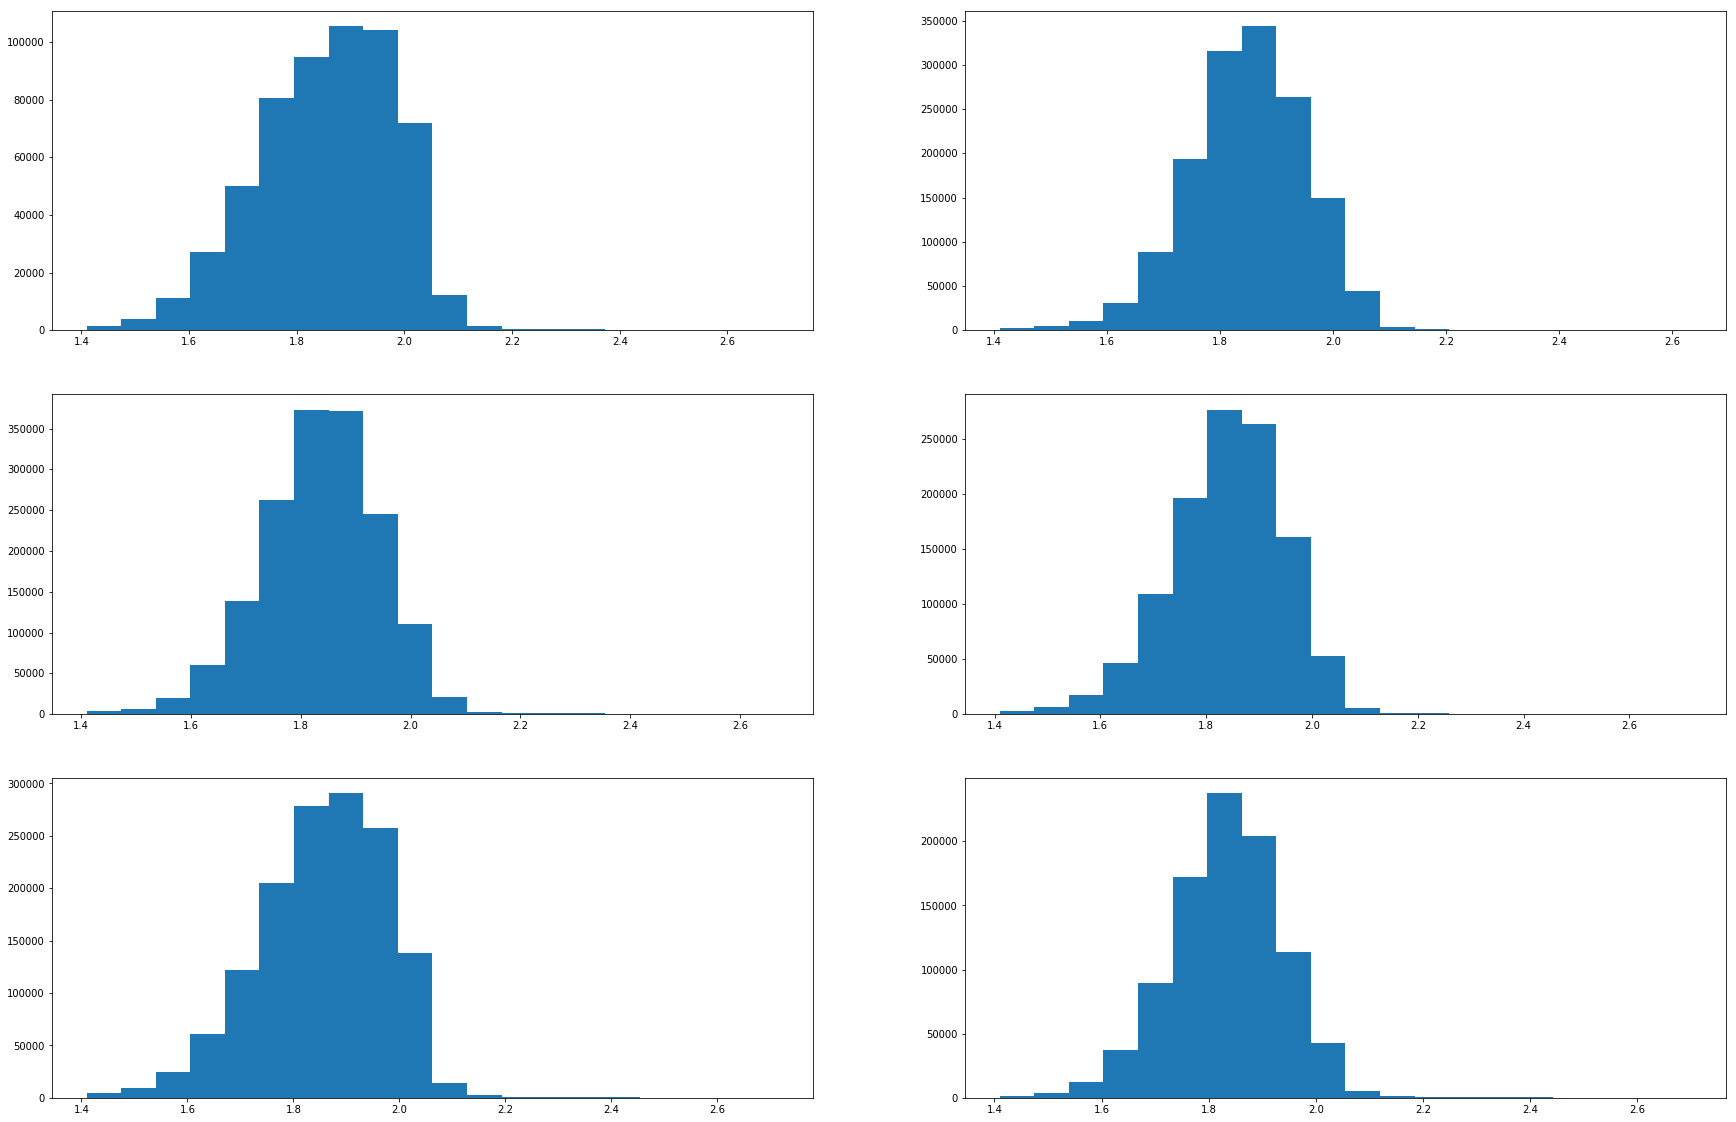

In [53]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.hist(log(log(stations[i]['tripduration'])),bins=20)

In [55]:
for i in range(6):
    print(stations[i]['tripduration'].describe())

count    5.667980e+05
mean     1.001594e+03
std      8.148759e+03
min      6.000000e+01
25%      3.560000e+02
50%      6.490000e+02
75%      1.156000e+03
max      2.668100e+06
Name: tripduration, dtype: float64
count    1.456644e+06
mean     8.037913e+02
std      3.890122e+03
min      6.000000e+01
25%      3.860000e+02
50%      5.860000e+02
75%      9.180000e+02
max      1.122718e+06
Name: tripduration, dtype: float64
count    1.619237e+06
mean     7.672882e+02
std      5.753465e+03
min      6.000000e+01
25%      3.550000e+02
50%      5.500000e+02
75%      8.540000e+02
max      1.865878e+06
Name: tripduration, dtype: float64
count    1.138972e+06
mean     7.760060e+02
std      5.654718e+03
min      6.000000e+01
25%      3.640000e+02
50%      5.720000e+02
75%      8.860000e+02
max      3.742976e+06
Name: tripduration, dtype: float64
count    1.410437e+06
mean     9.144748e+02
std      7.067252e+03
min      6.000000e+01
25%      3.780000e+02
50%      6.430000e+02
75%      1.104000e+03
ma

In [ ]:
stations = [tripdata[tripdata['label']==i]['tripduration'] for i in range(0,6)]